In [1]:
from uncertainties import ufloat
from uncertainties.umath import log10
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag, add_colors_and_abs_mag_photogeo, extinction_coefficient

from dustmaps.bayestar import BayestarWebQuery
query = BayestarWebQuery()

from astropy.coordinates import ICRS, SkyCoord
import astropy.units as u

Configuration file not found:

    /home/maya/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


In [2]:
c = pd.read_csv('./data/ngc_188/dbscan_clustered.csv').drop(columns='Unnamed: 0')
sources: pd.DataFrame = pd.read_csv('./clustered_photogeo.csv', index_col=None).rename(
    columns={'r_med_photogeo': 'distance',
             'photogeo_minus_error': 'distance_minus_error',
             'photogeo_plus_error': 'distance_plus_error'}
)
sources.head()

,Unnamed: 0,source_id,solution_id,designation,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,distance,distance_minus_error,distance_plus_error,distance_error,label
0,27563,573324915078717824,1636148068921376768,Gaia DR3 573324915078717824,1628663345,2016.0,13.387256,0.074713,84.403584,0.074566,...,0.1277,0.0167,0.0040,0.0679,PHOENIX,2139.7788,175.1955,258.6030,216.89925,0
1,27658,573328625930452736,1636148068921376768,Gaia DR3 573328625930452736,1247774749,2016.0,11.992366,0.037056,84.436146,0.039419,...,0.0830,0.0311,0.0173,0.0439,PHOENIX,2301.3200,183.4904,279.9356,231.71300,0
2,27663,573328827792116992,1636148068921376768,Gaia DR3 573328827792116992,706542830,2016.0,12.472166,0.201840,84.449082,0.215700,...,NaN,NaN,NaN,NaN,NaN,1043.9130,133.5078,154.5146,144.01120,0
3,27669,573329102670025728,1636148068921376768,Gaia DR3 573329102670025728,1123586091,2016.0,12.233101,0.065832,84.460787,0.072113,...,0.1014,0.0196,0.0052,0.0540,PHOENIX,1698.0344,160.9671,183.3898,172.17845,0
4,28030,573343052724431360,1636148068921376768,Gaia DR3 573343052724431360,654512527,2016.0,15.764065,0.168689,84.508904,0.166331,...,NaN,NaN,NaN,NaN,NaN,1660.6827,197.7026,215.6193,206.66095,0


In [3]:
c = add_colors_and_abs_mag(c)
sources = add_colors_and_abs_mag_photogeo(sources)

In [4]:
c.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,G_err,E(B_V),A_V,A_G,A_BP,A_RP,color,color_error,mag_abs,mag_abs_error
0,1636148068921376768,Gaia DR3 573339170073986432,573339170073986432,1183470769,2016.0,17.141358,0.117548,84.451083,0.113088,0.547640,...,0.001813,0.21,0.638631,0.534068,0.691874,0.405141,1.180735,0.023433,6.665817,0.500505
1,1636148068921376768,Gaia DR3 573341304674009856,573341304674009856,297753663,2016.0,17.627554,0.041246,84.519049,0.038805,0.554564,...,0.000605,0.21,0.638631,0.534068,0.691874,0.405141,0.731784,0.007729,4.963589,0.174130
2,1636148068921376768,Gaia DR3 573343052724431360,573343052724431360,654512527,2016.0,15.764065,0.168689,84.508904,0.166331,0.560219,...,0.002152,0.21,0.638631,0.534068,0.691874,0.405141,1.540799,0.075549,7.283469,0.696823
3,1636148068921376768,Gaia DR3 573344633272421120,573344633272421120,1350517326,2016.0,15.401420,0.238333,84.585590,0.231550,0.465927,...,0.003215,0.14,0.425754,0.356045,0.461249,0.270094,0.735557,0.071936,7.685361,1.190803
4,1636148068921376768,Gaia DR3 573351475155035008,573351475155035008,236544348,2016.0,13.267578,0.474411,84.456973,0.483350,0.519350,...,0.005841,0.15,0.456165,0.381477,0.494195,0.289387,1.603039,0.170145,8.676971,2.127860


In [5]:
c.A_RP.describe()

count    1818.000000
mean        0.205607
std         0.048696
min         0.038585
25%         0.173632
50%         0.196357
75%         0.231509
max         0.443726
Name: A_RP, dtype: float64

In [6]:
sources.A_RP.describe()

count    2233.000000
mean        0.216960
std         0.050797
min         0.038585
25%         0.192924
50%         0.212217
75%         0.250802
max         0.443726
Name: A_RP, dtype: float64

In [7]:
(c.A_BP-c.A_RP).describe()

count    1818.000000
mean        0.145515
std         0.034464
min         0.027308
25%         0.122885
50%         0.138969
75%         0.163847
max         0.314040
dtype: float64

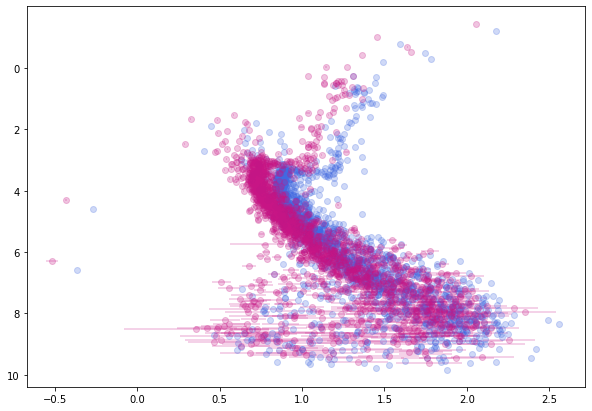

In [8]:
plt.figure(figsize=(10, 7))
plt.errorbar(c.BP-c.RP, c['G'] - 10. + 5.*np.log10(c['parallax']), fmt='o', alpha=.25, color='royalblue', label='No extinction correction')
plt.errorbar(c.color, c.mag_abs, xerr=c.color_error, fmt='o', alpha=.25, color='mediumvioletred', label='extinction correction')
plt.gca().invert_yaxis()

Text(0.5, 0.98, 'Photogeometric distances')

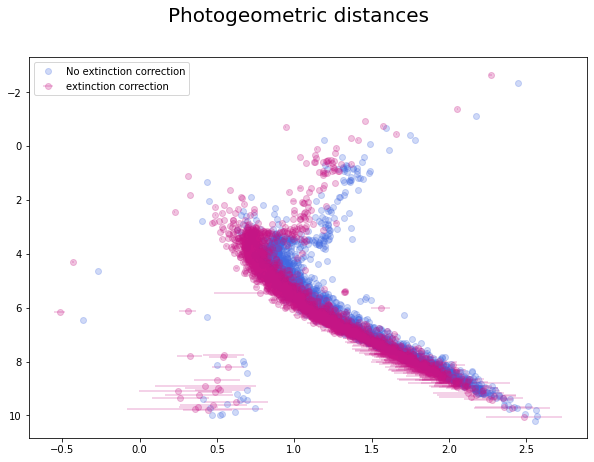

In [16]:
plt.figure(figsize=(10, 7))
plt.errorbar(sources.BP-sources.RP, sources['G'] + 5. - 5.*np.log10(sources['distance']), fmt='o', alpha=.25, color='royalblue', label='No extinction correction')
plt.errorbar(sources.color, sources.mag_abs, xerr=sources.color_error, fmt='o', alpha=.25, color='mediumvioletred', label='extinction correction')
plt.gca().invert_yaxis()
plt.legend()
plt.suptitle('Photogeometric distances', fontsize=20)

(10.0, 0.0)

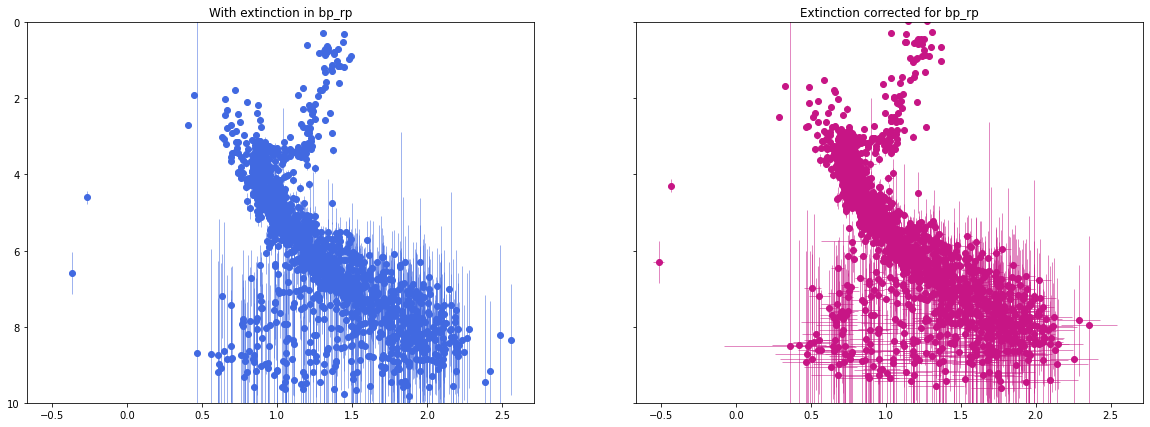

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharex=True, sharey=True)
ax[0].errorbar(c.BP-c.RP, c['G'] - 10. + 5.*np.log10(c['parallax']), yerr=c.mag_abs_error, fmt='o', color='royalblue', elinewidth=.5)
ax[0].set_title('With extinction in bp_rp')
ax[1].errorbar(c.color, c.mag_abs, yerr=c.mag_abs_error, xerr=c.color_error,
               fmt='o',color='mediumvioletred', elinewidth=.5)
ax[1].set_title('Extinction corrected for bp_rp')
ax[0].invert_yaxis()
ax[0].set_ylim(10, 0)

In [4]:
def plot_hr(sources: pd.DataFrame, color: str='mediumvioletred'):
    plt.errorbar(sources.color, sources.mag_abs,
                 xerr=sources.color_err, yerr=sources.mag_abs_err, color=color, fmt='o')
    plt.gca().invert_yaxis()
    plt.gca().set_xlabel('B-R [mag]', fontsize=14);
    plt.gca().set_ylabel('absolute magnitude [mag]', fontsize=14);
    plt.gca().set_ylim(10, -1)

/home/mjablons/.local/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/mjablons/.local/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


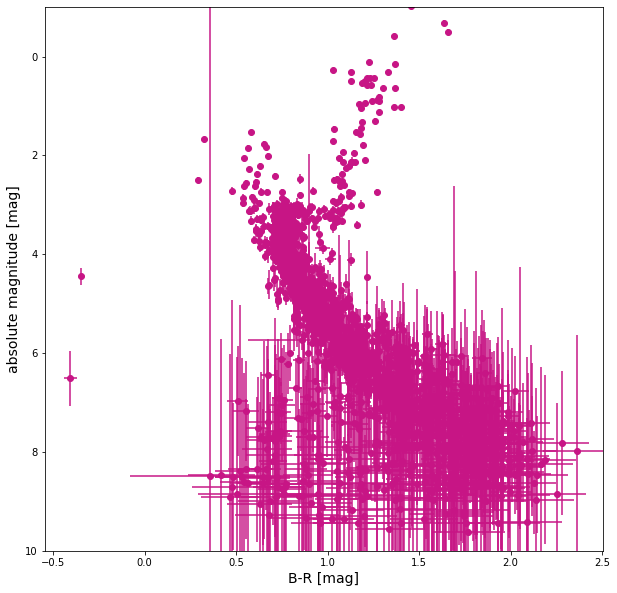

In [5]:
plt.figure(figsize=(10, 10))
plot_hr(c)

/home/mjablons/.local/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/mjablons/.local/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


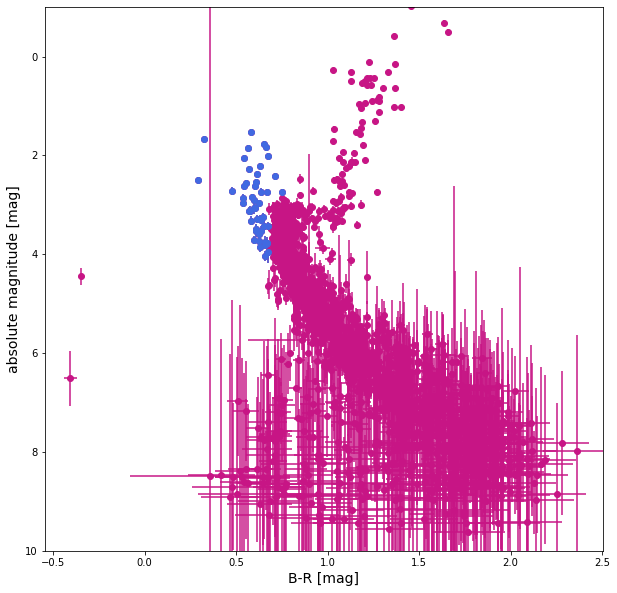

In [6]:
plt.figure(figsize=(10, 10))
blue_stragglers = c[((c.color < .68) & (c.mag_abs<4.1)) | ((c.color < .75) & (c.mag_abs<2.8))]
plot_hr(c)
plot_hr(blue_stragglers, 'royalblue')

In [139]:
len(blue_stragglers)

49

In [140]:
blue_stragglers.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,RP_err,G_err,B(E_V),A_G,A_BP,A_RP,color,color_err,mag_abs,mag_abs_err
52,1636148068921376768,Gaia DR3 573548974933750144,573548974933750144,146137968,2016.0,9.880612,0.016126,84.826773,0.014635,0.488820,...,0.000957,0.000297,0.11,0.285168,0.369429,0.216327,0.584362,0.001416,2.849810,0.075992
186,1636148068921376768,Gaia DR3 573583059794072832,573583059794072832,40232240,2016.0,4.161714,0.019715,84.788042,0.017141,0.543177,...,0.001100,0.000276,0.14,0.362941,0.470183,0.275325,0.629616,0.002261,3.288553,0.079843
211,1636148068921376768,Gaia DR3 573618209806351872,573618209806351872,1766859567,2016.0,4.879116,0.015959,85.158393,0.015772,0.497824,...,0.000871,0.000275,0.11,0.285168,0.369429,0.216327,0.479060,0.001268,2.719774,0.076720
220,1636148068921376768,Gaia DR3 573620718067262848,573620718067262848,1085318884,2016.0,5.713011,0.013885,85.130337,0.013513,0.502753,...,0.000807,0.000237,0.11,0.285168,0.369429,0.216327,0.544272,0.001382,2.627833,0.064754
242,1636148068921376768,Gaia DR3 573627624374983680,573627624374983680,544969966,2016.0,3.758786,0.020979,85.346961,0.021512,0.501796,...,0.001355,0.000314,0.14,0.362941,0.470183,0.275325,0.636567,0.002754,3.537587,0.104148


In [87]:
list(blue_stragglers.columns)

['solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_sigma5d_max

In [97]:
blue_stragglers.phot_variable_flag

52      NOT_AVAILABLE
186     NOT_AVAILABLE
211     NOT_AVAILABLE
220     NOT_AVAILABLE
242     NOT_AVAILABLE
256     NOT_AVAILABLE
278     NOT_AVAILABLE
288     NOT_AVAILABLE
297     NOT_AVAILABLE
397     NOT_AVAILABLE
412     NOT_AVAILABLE
453     NOT_AVAILABLE
454     NOT_AVAILABLE
457     NOT_AVAILABLE
593     NOT_AVAILABLE
599     NOT_AVAILABLE
787     NOT_AVAILABLE
797     NOT_AVAILABLE
848     NOT_AVAILABLE
870     NOT_AVAILABLE
872     NOT_AVAILABLE
901     NOT_AVAILABLE
961     NOT_AVAILABLE
976     NOT_AVAILABLE
1031    NOT_AVAILABLE
1038    NOT_AVAILABLE
1043    NOT_AVAILABLE
1109    NOT_AVAILABLE
1113    NOT_AVAILABLE
1140    NOT_AVAILABLE
1145    NOT_AVAILABLE
1221    NOT_AVAILABLE
1266    NOT_AVAILABLE
1279    NOT_AVAILABLE
1281    NOT_AVAILABLE
1293         VARIABLE
1345    NOT_AVAILABLE
1368    NOT_AVAILABLE
1480    NOT_AVAILABLE
1592    NOT_AVAILABLE
1634    NOT_AVAILABLE
1657         VARIABLE
1682    NOT_AVAILABLE
1701    NOT_AVAILABLE
1738    NOT_AVAILABLE
1751    NO

In [98]:
lit = pd.read_csv('./data/ngc_188/literature.csv')

In [99]:
lit.head()

,Unnamed: 0,obj_id,oid,link_bibcode,ra,dec,coo_bibcode,parallax,parallax_err,parallax_bibcode,...,pm_err,pm_bibcode,radvel,radvel_err,rvz_bibcode,ids,EDR3 id,DR2 id,TIC,reported
0,0,NGC 188 1054,303084,2004PASP..116.1012S,11.191250,85.256734,2020yCat.1350....0G,0.5409,0.0189,2020yCat.1350....0G,...,3.0,2020yCat.1350....0G,-42.18,NaN,2008AJ....135.2264G,Gaia EDR3 573942325217383424|TIC 461601298|2MA...,573942325217383424,5.739423e+17,461601298.0,8
1,1,Cl* NGC 188 DGV 1869,303589,2004PASP..116.1012S,9.743203,85.559916,2020yCat.1350....0G,0.5191,0.0232,2020yCat.1350....0G,...,3.0,2020yCat.1350....0G,-42.74,NaN,2008AJ....135.2264G,Gaia EDR3 573982010715088256|TIC 461597588|2MA...,573982010715088256,5.739820e+17,461597588.0,8
2,2,NGC 188 2014,303857,2004PASP..116.1012S,10.977598,85.205113,2020yCat.1350....0G,0.4785,0.0404,2020yCat.1350....0G,...,3.0,2020yCat.1350....0G,NaN,NaN,NaN,Gaia EDR3 573935899946338816|TIC 461599220|2MA...,573935899946338816,5.739359e+17,461599220.0,6
3,3,NGC 188 1152,303904,2004PASP..116.1012S,11.164145,85.242850,2020yCat.1350....0G,0.6603,0.0853,2020yCat.1350....0G,...,3.0,2020yCat.1350....0G,NaN,NaN,NaN,Gaia EDR3 573941942962994176|TIC 461601256|2MA...,573941942962994176,5.739419e+17,461601256.0,3
4,4,NGC 188 3129,303875,2004PASP..116.1012S,11.151445,85.352770,2020yCat.1350....0G,0.5443,0.0169,2020yCat.1350....0G,...,3.0,2020yCat.1350....0G,-42.69,NaN,2008AJ....135.2264G,Gaia EDR3 573944215002950144|TIC 461601456|2MA...,573944215002950144,5.739442e+17,461601456.0,8


In [106]:
blue_stragglers = blue_stragglers.set_index('source_id')

In [107]:
lit = lit.set_index('EDR3 id')

In [109]:
lit.head()

,Unnamed: 0,obj_id,oid,link_bibcode,ra,dec,coo_bibcode,parallax,parallax_err,parallax_bibcode,...,pmdec,pm_err,pm_bibcode,radvel,radvel_err,rvz_bibcode,ids,DR2 id,TIC,reported
EDR3 id,,,,,,,,,,,,,,,,,,,,,
573942325217383424,0,NGC 188 1054,303084,2004PASP..116.1012S,11.191250,85.256734,2020yCat.1350....0G,0.5409,0.0189,2020yCat.1350....0G,...,-1.099,3.0,2020yCat.1350....0G,-42.18,NaN,2008AJ....135.2264G,Gaia EDR3 573942325217383424|TIC 461601298|2MA...,5.739423e+17,461601298.0,8
573982010715088256,1,Cl* NGC 188 DGV 1869,303589,2004PASP..116.1012S,9.743203,85.559916,2020yCat.1350....0G,0.5191,0.0232,2020yCat.1350....0G,...,-1.110,3.0,2020yCat.1350....0G,-42.74,NaN,2008AJ....135.2264G,Gaia EDR3 573982010715088256|TIC 461597588|2MA...,5.739820e+17,461597588.0,8
573935899946338816,2,NGC 188 2014,303857,2004PASP..116.1012S,10.977598,85.205113,2020yCat.1350....0G,0.4785,0.0404,2020yCat.1350....0G,...,-1.021,3.0,2020yCat.1350....0G,NaN,NaN,NaN,Gaia EDR3 573935899946338816|TIC 461599220|2MA...,5.739359e+17,461599220.0,6
573941942962994176,3,NGC 188 1152,303904,2004PASP..116.1012S,11.164145,85.242850,2020yCat.1350....0G,0.6603,0.0853,2020yCat.1350....0G,...,-1.057,3.0,2020yCat.1350....0G,NaN,NaN,NaN,Gaia EDR3 573941942962994176|TIC 461601256|2MA...,5.739419e+17,461601256.0,3
573944215002950144,4,NGC 188 3129,303875,2004PASP..116.1012S,11.151445,85.352770,2020yCat.1350....0G,0.5443,0.0169,2020yCat.1350....0G,...,-0.980,3.0,2020yCat.1350....0G,-42.69,NaN,2008AJ....135.2264G,Gaia EDR3 573944215002950144|TIC 461601456|2MA...,5.739442e+17,461601456.0,8


In [111]:
blue_stragglers_with_TESS = blue_stragglers.join(lit[['TIC']]).dropna(subset=['TIC'])

In [112]:
blue_stragglers_with_TESS.head()

,solution_id,designation,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,G_err,B(E_V),A_G,A_BP,A_RP,color,color_err,mag_abs,mag_abs_err,TIC
source_id,,,,,,,,,,,,,,,,,,,,,
573777157954464384,1636148068921376768,Gaia DR3 573777157954464384,1004884449,2016.0,14.358722,0.017223,85.343332,0.015942,0.468657,0.018391,...,0.000289,0.10,0.259244,0.335845,0.196661,0.596643,0.002075,2.894727,0.085213,461620685.0
573934177663443456,1636148068921376768,Gaia DR3 573934177663443456,363473991,2016.0,11.388943,0.018819,85.096838,0.017692,0.536656,0.020043,...,0.000279,0.12,0.311092,0.403014,0.235993,0.675810,0.002486,3.429666,0.081101,461601045.0
573938305128033920,1636148068921376768,Gaia DR3 573938305128033920,1315389913,2016.0,12.227328,0.020073,85.210201,0.018288,0.591021,0.021111,...,0.000285,0.06,0.155546,0.201507,0.117997,0.613983,0.001626,3.289048,0.077564,461618652.0
573939404639640704,1636148068921376768,Gaia DR3 573939404639640704,65868889,2016.0,13.107909,0.010876,85.257747,0.010012,0.523955,0.011361,...,0.000201,0.10,0.259244,0.335845,0.196661,0.660341,0.000996,1.823685,0.047085,461618739.0
573939679517550848,1636148068921376768,Gaia DR3 573939679517550848,241584833,2016.0,12.545429,0.021106,85.243914,0.020118,0.551444,0.021718,...,0.000417,0.10,0.259244,0.335845,0.196661,0.597215,0.002543,3.709230,0.085522,461618718.0


In [8]:
from lightkurve import search_lightcurve

In [20]:
lightcurves = search_lightcurve('TIC 461601045').download_all()

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]

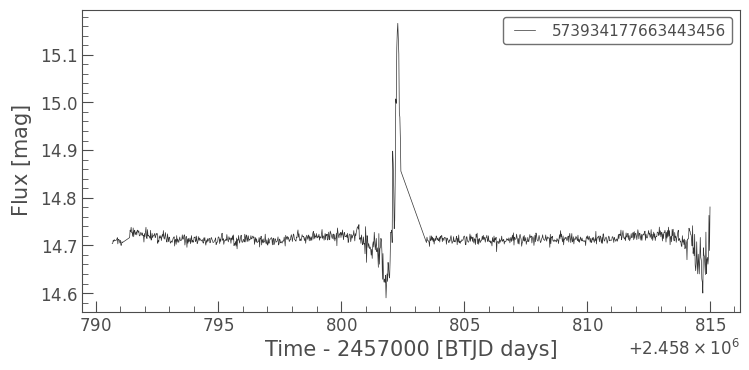

In [25]:
lightcurves[0].plot();